In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

%matplotlib inline

Плотности распределения Стьюдента

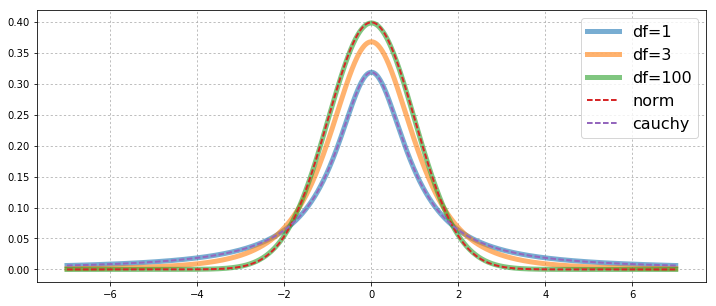

In [56]:
grid = np.linspace(-7, 7, 1000)
plt.figure(figsize=(12, 5))
plt.plot(grid, sps.t(df=1).pdf(grid), label='df=1', lw=5, alpha=0.6)
plt.plot(grid, sps.t(df=3).pdf(grid), label='df=3', lw=5, alpha=0.6)
plt.plot(grid, sps.t(df=100).pdf(grid), label='df=100', lw=5, alpha=0.6)
plt.plot(grid, sps.norm.pdf(grid), '--', lw=2, label='norm')
plt.plot(grid, sps.cauchy.pdf(grid), '--', lw=2, label='cauchy')
plt.grid(ls=':')
plt.legend(fontsize=16)
plt.show()

Плотности распределения Фишера

/usr/local/lib/python3.5/dist-packages/scipy/stats/_continuous_distns.py:1415: RuntimeWarning: divide by zero encountered in log
  lPx = m/2 * log(m) + n/2 * log(n) + (n/2 - 1) * log(x)


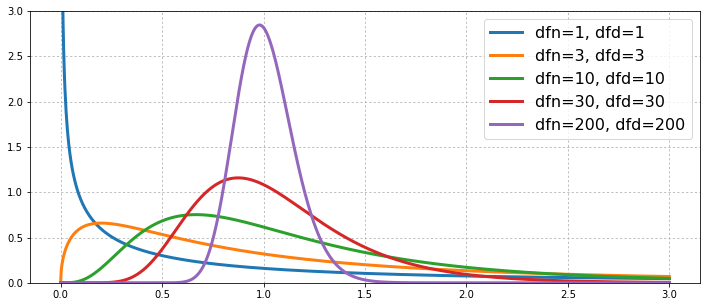

In [31]:
grid = np.linspace(0, 3, 1000)
plt.figure(figsize=(12, 5))
plt.plot(grid, sps.f(dfn=1, dfd=1).pdf(grid), label='dfn=1, dfd=1', lw=3)
plt.plot(grid, sps.f(dfn=3, dfd=3).pdf(grid), label='dfn=3, dfd=3', lw=3)
plt.plot(grid, sps.f(dfn=10, dfd=10).pdf(grid), label='dfn=10, dfd=10', lw=3)
plt.plot(grid, sps.f(dfn=30, dfd=30).pdf(grid), label='dfn=30, dfd=30', lw=3)
plt.plot(grid, sps.f(dfn=200, dfd=200).pdf(grid), label='dfn=200, dfd=200', lw=3)
plt.grid(ls=':')
plt.legend(fontsize=16)
plt.ylim((0, 3))
plt.show()

### Критерий Смирнова

$H_0: F = G$

$H_1: F \not= G$

<a href=https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html#scipy.stats.ks_2samp>`ks_2samp`</a>`(data1, data2): statistic, pvalue`

In [2]:
sample_1 = sps.norm(loc=0).rvs(size=100)
sample_2 = sps.norm(loc=1).rvs(size=100)
sps.ks_2samp(sample_1, sample_2)

Ks_2sampResult(statistic=0.48000000000000004, pvalue=8.082782892919144e-11)

In [3]:
sample_1 = sps.norm(loc=0, scale=1).rvs(size=100)
sample_2 = sps.norm(loc=0, scale=2).rvs(size=100)
sps.ks_2samp(sample_1, sample_2)

Ks_2sampResult(statistic=0.26000000000000001, pvalue=0.0017846674219800561)

In [8]:
sample_1 = sps.norm(loc=0, scale=1).rvs(size=30)
sample_2 = sps.norm(loc=0, scale=2).rvs(size=500)
sps.ks_2samp(sample_1, sample_2)

Ks_2sampResult(statistic=0.22866666666666668, pvalue=0.08845496913208406)

In [12]:
sample_1 = sps.norm(loc=0, scale=1).rvs(size=300)
sample_2 = sps.norm(loc=0, scale=1).rvs(size=500)
sps.ks_2samp(sample_1, sample_2)

Ks_2sampResult(statistic=0.055333333333333345, pvalue=0.60237244916601151)

In [59]:
sample_1 = sps.norm.rvs(size=100)
sample_2 = sps.cauchy.rvs(size=100)
sps.ks_2samp(sample_1, sample_2)

Ks_2sampResult(statistic=0.21999999999999997, pvalue=0.013112321748637842)

In [60]:
sample_1 = sps.norm.rvs(size=100)
sample_2 = sps.laplace.rvs(size=100)
sps.ks_2samp(sample_1, sample_2)

Ks_2sampResult(statistic=0.12, pvalue=0.44312540269882572)

### Критерий ранговых сумм Уилкоксона (независимые выборки)


$H_0: F = G$

$H_1: F \leqslant G \text{ или } F \geqslant G$ 

<a href=https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ranksums.html#scipy.stats.ranksums>`ranksums`</a>`(data1, data2): statistic, pvalue`

In [61]:
sample_1 = sps.norm(loc=0).rvs(size=100)
sample_2 = sps.norm(loc=1).rvs(size=100)
sps.ranksums(sample_1, sample_2)

RanksumsResult(statistic=-5.2508427184339981, pvalue=1.5140491968853275e-07)

In [62]:
sample_1 = sps.norm(loc=0).rvs(size=100)
sample_2 = sps.norm(loc=0).rvs(size=100)
sps.ranksums(sample_1, sample_2)

RanksumsResult(statistic=-0.063528111065278711, pvalue=0.9493459750554667)

In [65]:
sample_1 = sps.norm(loc=0).rvs(size=100)
sample_2 = sps.norm(loc=1, scale=10).rvs(size=100)
sps.ranksums(sample_1, sample_2)

RanksumsResult(statistic=-0.53754555516774294, pvalue=0.59089082648425051)

In [67]:
sample_1 = sps.cauchy(loc=0).rvs(size=100)
sample_2 = sps.cauchy(loc=1).rvs(size=100)
sps.ranksums(sample_1, sample_2)

RanksumsResult(statistic=-2.0744371651700626, pvalue=0.0380387287065981)

### Критерий ранговых сумм Уилкоксона (парные выборки)

$H_0: F = G$

$H_1: F \leqslant G \text{ или } F \geqslant G$ 

<a href=https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html#scipy.stats.wilcoxon>`wilcoxon`</a>`(x, y=None, zero_method='wilcox'): statistic, pvalue`

`x`, `y` --- выборки. Если `y=None`, то в `x` разности.

`zero_method : {“pratt”, “wilcox”, “zsplit”}`

In [68]:
sample_1 = sps.norm(loc=0).rvs(size=100)
sample_2 = sample_1 + sps.norm(loc=0, scale=0.5).rvs(size=100)
sps.wilcoxon(sample_1, sample_2)

WilcoxonResult(statistic=2314.0, pvalue=0.46815359816538893)

In [69]:
sample_1 = sps.norm(loc=0).rvs(size=100)
sample_2 = sample_1 + sps.norm(loc=0.5, scale=0.5).rvs(size=100)
sps.wilcoxon(sample_1, sample_2)

WilcoxonResult(statistic=380.0, pvalue=1.6409015596347118e-13)

In [70]:
sample_1 = sps.norm(loc=0).rvs(size=100)
sample_2 = sample_1 + sps.norm(loc=-0.5, scale=0.5).rvs(size=100)
sps.wilcoxon(sample_1, sample_2)

WilcoxonResult(statistic=465.0, pvalue=1.4111844085803348e-12)

Времена реакции (Лагутин, стр. 221)

In [91]:
sample_1 = [176, 163, 152, 155, 156, 178, 160, 164, 169, 155, 122, 144]
sample_2 = [168, 215, 172, 200, 191, 197, 183, 174, 176, 155, 115, 163]
sps.wilcoxon(sample_1, sample_2)

WilcoxonResult(statistic=4.5, pvalue=0.011197738894413023)

### Одновыборочный T-критерий

$X_1, ..., X_n \sim \mathcal{N}(\mu, \sigma^2)$

$H_0: \mu = \mu_0$

$H_1: \mu \not= \mu_0$ 

<a href=https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html#scipy.stats.ttest_1samp>`ttest_1samp`</a>`(a, popmean): statistic, pvalue`

`a` --- выборка

`popmean` --- равно $\mu_0$

In [72]:
sample = sps.norm(loc=0).rvs(size=100)
sps.ttest_1samp(sample, 0), sps.ttest_1samp(sample, 0.5)

(Ttest_1sampResult(statistic=0.034961127085227452, pvalue=0.97218113260134054),
 Ttest_1sampResult(statistic=-5.1773841119902038, pvalue=1.1828969751167706e-06))

### Двухвыборочный T-критерий Стьюдента (Аспина-Уэлша) - независимые выборки

Даны две независимые выборки

$X_1, ..., X_n \sim \mathcal{N}(\mu_1, \sigma_1^2)$

$Y_1, ..., Y_m \sim \mathcal{N}(\mu_2, \sigma_2^2)$

$H_0: \mu_1 = \mu_2$

$H_1: \mu_1 \not= \mu_2$ 

<a href=https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind>`ttest_ind`</a>`(a, b, equal_var=True): statistic, pvalue`

`a`, `b` --- выборка

`equal_var` --- известно ли равенство дисперсий

In [73]:
sample_1 = sps.norm(loc=0).rvs(size=100)
sample_2 = sps.norm(loc=1).rvs(size=100)
sps.ttest_ind(sample_1, sample_2)

Ttest_indResult(statistic=-6.7790038852126093, pvalue=1.3578588907121738e-10)

In [79]:
sample_1 = sps.norm(loc=0).rvs(size=100)
sample_2 = sps.norm(loc=1, scale=3).rvs(size=100)
sps.ttest_ind(sample_1, sample_2), sps.ttest_ind(sample_1, sample_2, equal_var=False)

(Ttest_indResult(statistic=-3.8856005206269462, pvalue=0.00013915999675993216),
 Ttest_indResult(statistic=-3.8856005206269462, pvalue=0.00016481173973369826))

### Двухвыборочный T-критерий Стьюдента - связные выборки

Даны две связные выборки

$X_1, ..., X_n \sim \mathcal{N}(\mu_1, \sigma_1^2)$

$Y_1, ..., Y_т \sim \mathcal{N}(\mu_2, \sigma_2^2)$

$H_0: \mu_1 = \mu_2$

$H_1: \mu_1 \not= \mu_2$ 

<a href=https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#scipy.stats.ttest_rel>`ttest_rel`</a>`(a, b): statistic, pvalue`

`a`, `b` --- выборка

In [80]:
sample_1 = sps.norm(loc=0).rvs(size=100)
sample_2 = sample_1 + sps.norm(loc=0, scale=0.5).rvs(size=100)
sps.ttest_rel(sample_1, sample_2)

Ttest_relResult(statistic=0.79426285232367644, pvalue=0.4289422512656933)

In [81]:
sample_1 = sps.norm(loc=0).rvs(size=100)
sample_2 = sample_1 + sps.norm(loc=0.5, scale=0.5).rvs(size=100)
sps.ttest_rel(sample_1, sample_2)

Ttest_relResult(statistic=-11.01539545954714, pvalue=6.761685159480031e-19)